## 数理统计


目录

- 1.基本概念
- 2.经验分布函数与直方图
- 3.统计量与统计量的抽样分布
- 4.正态总体构造的三大统计量与分布
- 5.参数估计-点估计
- 6.参数估计-区间估计
- 7.假设检验


数理统计思维导图

<img src="./images/数理统计思维导图.png"/>

### 0.概述

在概率论的建模中，我们往往假设随机变量的分布已知，但是这个假设在实际中时很难做到的。

统计学能做的就是找到最佳的参数，如正态分布的$\mu$和$\sigma^2$，也会关心$\mu$和$\sigma^2$是否符合符合相关要求。

使用一个更通俗的例子来说，由于概率论的建模，现在假设中国人的身高近似服从正态分布，那究竟这个正态分布中的$\mu$和$\sigma^2$的值是多少就是统计学做的事情，而这个工作也叫做参数估计。

**一般认为，统计学是收集、分析、表述和解释数据的科学，统计学是一门处理数据的方法和技术的学科。**

[《概率论》学习笔记](https://zhuanlan.zhihu.com/p/418319247)

**概率论与统计学的关系**

<img src="./images/1.png"/>

<img src="./images/2.png"/>

### 1.总体个体样本基本概念

总体：研究对象的全体，它是一个随机变量，用$X$表示。

个体：组成总体的每个基本元素。

样本：来自总体$X$的$n$个相互独立且与总体同分布的随机变量$X_{1},X_{2}\cdots,X_{n}$，称为容量为$n$的简单随机样本，简称样本。


### 2.经验分布函数与直方图

2.1 经验分布函数

经验分布函数就是使用样本信息构造的分布函数近似未知的总体分布函数：

例子：随机观察总体X, 得到一个容量为 10 的样本:
$$
3.2, \quad 2.5, \quad-2, \quad 2.5, \quad 0,\quad 3,\quad 2 ,\quad 2.5, \quad 2, \quad 4
$$
求 $\mathrm{X}$ 经验分布函数。

解：首先，将样本排序 $-2<0<2=2<2.5=2.5=2.5<3<3.2<4$

于是，根据公式可以得到经验分布函数：
$$
F_{10}(x)=\left\{\begin{array}{cc}
0, & x<-2 \\
1 / 10, & -2 \leq x<0 \\
2 / 10, & 0 \leq x<2 \\
4 / 10, & 2 \leq x<2.5 \\
7 / 10, & 2.5 \leq x<3 \\
8 / 10, & 3 \leq x<3.2 \\
9 / 10, & 3.2 \leq x<4 \\
1, & x \ge 4
\end{array},\right.
$$



2.2 直方图

直方图是数值数据分布的精确图形表示， 这是一个连续变量（定量变量）的概率分布的估计。

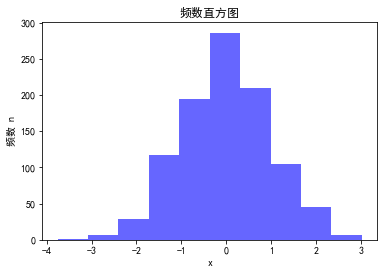

In [6]:
# 频数直方图
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

x_samples = np.random.randn(1000)
plt.hist(x_samples, bins=10,color='blue',alpha=0.6)  # bins=10代表10根柱子
plt.xlabel("x")
plt.ylabel("频数 n")
plt.title("频数直方图")
plt.show()

### 3.统计量与统计量的抽样分布
统计量：设$X_{1},X_{2}\cdots,X_{n}$是来自总体$X$的一个样本，$g(X_{1},X_{2}\cdots,X_{n})$）是样本的连续函数，且$g()$中不含任何未知参数，则称$g(X_{1},X_{2}\cdots,X_{n})$为统计量。

样本均值：$\overline{X} = \frac{1}{n}\sum_{i = 1}^{n}X_{i}$

样本方差：$S^{2} = \frac{1}{n - 1}\sum_{i = 1}^{n}{(X_{i} - \overline{X})}^{2}$

样本矩：样本$k$阶原点矩：$A_{k} = \frac{1}{n}\sum_{i = 1}^{n}X_{i}^{k},k = 1,2,\cdots$

样本$k$阶中心矩：$B_{k} = \frac{1}{n}\sum_{i = 1}^{n}{(X_{i} - \overline{X})}^{k},k = 1,2,\cdots$

3.1 样本均值

设 $x_{1}, x_{2}, \cdots, x_{n}$ 为取自某总体的样本， 其算术平均值称为样本均值，一 般用 $\bar{x}$ 表示，即
$$
\bar{x}=\frac{x_{1}+x_{2}+\cdots+x_{n}}{n}=\frac{1}{n} \sum_{i=1}^{n} x_{i} 
$$
如果把样本中的数据与样本均值的差称为偏差， 则样本所有偏差之和为 0， 即 $\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)=0$。

In [8]:
# 从总体/总体的分布中抽取样本并计算样本均值和计算偏差
import numpy as np

# 1.从总体中抽取样本
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])  # 假设总体为X
x_i = np.random.choice(X, 10, replace=False)  # 从总体X中抽取10个样本
x_mean = np.mean(x_i)  # 计算样本均值
x_bias = np.sum(x_i - x_mean)  # 计算偏差和
print("样本均值为：", x_mean)
print("偏差和为：", round(x_bias, 0))

# 2.从总体分布中抽取样本，假设总体分布为N（0, 1）
x_i = np.random.randn(10)  # 从总体分布N(0, 1)中抽取10个样本
x_mean = np.mean(x_i)  # 计算样本均值
x_bias = np.sum(x_i - x_mean)  # 计算偏差和
print("样本均值为：", x_mean)
print("偏差和为：", round(x_bias, 0))


样本均值为： 11.1
偏差和为： 0.0
样本均值为： 0.3424089402887168
偏差和为： 0.0


3.2 样本均值的分布
   - （a）假设现在有20个数组成的总体；
   - （b）每次从总体中抽取5个样本，计算样本均值；
   - （c）重复b步骤10次，100次，1000次，10000次，100000次，观察不同重复次数的抽样的样本均值的分布情况。

从下面的实验可以看到，样本均值的分布，即**样本均值的抽样分布当n越来越大时近似服从正态分布**。


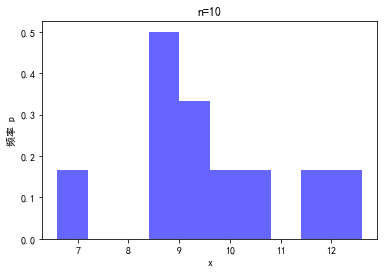

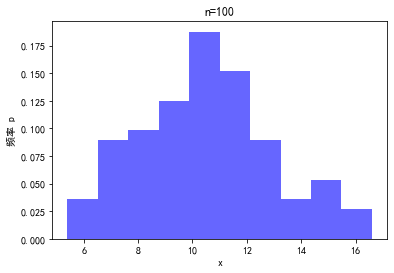

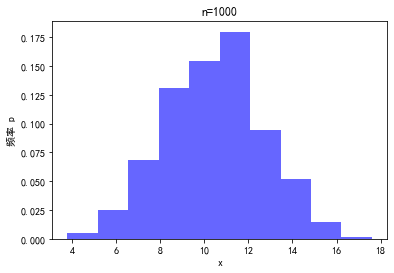

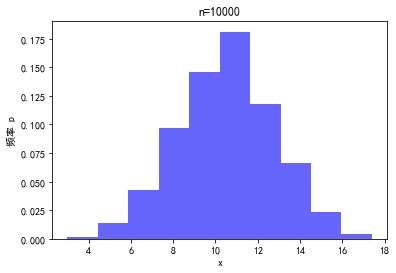

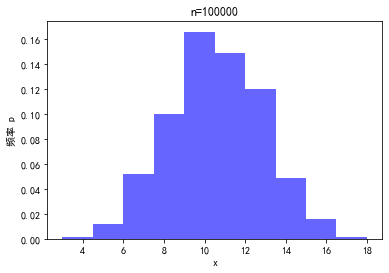

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

def get_sample_dist(n, x):
    x_mean_list = []
    for i in range(n):
        x_i = np.random.choice(x, 5, replace=False)
        x_mean = np.mean(x_i)
        x_mean_list.append(x_mean)
    plt.hist(x_mean_list, color='blue', alpha=0.6, density=True)
    plt.xlabel("x")
    plt.ylabel("频率 p")
    plt.title("n=" + str(n))
    plt.show()


# 假设总体为x, size=20
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
get_sample_dist(10, x)
get_sample_dist(100, x)
get_sample_dist(1000, x)
get_sample_dist(10000, x)
get_sample_dist(100000, x)


3.3 样本方差与标准差

设 $x_{1}, x_{2}, \cdots, x_{n}$ 为取自某总体的样本，则它关于样本均值 $\bar{x}$ 的平均偏差平方和
$$
s_{n}^{2}=\frac{1}{n} \sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{2}
$$
称为样本方差。

样本标准差就是样本方差的算术平方根，即：$s_{n}=\sqrt{s_{n}^{2}}$。


In [ ]:
# 从总体/总体的分布中抽取样本并计算样本方差与样本标准差
import numpy as np

# 1.从总体中抽取样本
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])  # 假设总体为X
x_i = np.random.choice(X, 10, replace=False)  # 从总体X中抽取10个样本
x_sn2 = np.var(x_i, ddof=0)  # 样本方差
x_s2 = np.var(x_i, ddof=1)  # 无偏样本方差
x_sn = np.std(x_i, ddof=0)  # 样本标准差
x_s = np.std(x_i, ddof=1)  # 无偏样本标准差
print("样本方差sn^2为：", x_sn2)
print("样本方差s^2为：", x_s2)
print("样本标准差sn^2为：", x_sn)
print("样本标准差s^2为：", x_s)

# 2.从总体分布中抽取样本，假设总体分布为N（0，1）
x_i = np.random.randn(10)  # 从总体分布N(0,1)中抽取10个样本
x_sn2 = np.var(x_i, ddof=0)  # 样本方差
x_s2 = np.var(x_i, ddof=1)  # 无偏样本方差
x_sn = np.std(x_i, ddof=0)  # 样本标准差
x_s = np.std(x_i, ddof=1)  # 无偏样本标准差
print("样本方差sn^2为：", x_sn2)
print("样本方差s^2为：", x_s2)
print("样本标准差sn^2为：", x_sn)
print("样本标准差s^2为：", x_s)

样本方差sn^2为： 37.56
样本方差s^2为： 41.733333333333334
样本标准差sn^2为： 6.128621378417825
样本标准差s^2为： 6.460134157533676
样本方差sn^2为： 0.8720743080727834
样本方差s^2为： 0.9689714534142038
样本标准差sn^2为： 0.9338491891482176
样本标准差s^2为： 0.9843634762699213


3.4 样本方差与标准差的分布

样本方差/标准差的分布并没有像样本均值那样有完美的渐近分布，不同总体下的样本方差/样本标准差的分布都不一样

当总体服从正态分布条件下的与样本方差/样本标准差有关的分布，是三大抽样分布中的卡方分布。

设总体为 $X$ 方差存在， 即 $E(X)=\mu, \operatorname{Var}(X)=\sigma^{2}<\infty, x_{1}, x_{2}, \cdots, x_{n}$ 为 从该总体得到的样本， $\bar{x}$ 和 $s^{2}$ 分别是样本均值和样本方差, 则
$$
\begin{gathered}
E(\bar{x})=\mu, \quad \operatorname{Var}(\bar{x})=\sigma^{2} / n, \\
E\left(s^{2}\right)=\sigma^{2} .
\end{gathered}
$$
此定理表明， 样本均值的期望与总体均值相同， 而样本均值的方差是总体方差的 $1 / n$。

下面，我们使用一个实验来验证以上的观点：
   - （a）假设总体为$$X，为了方便起见，$X～N（0，1）$；
   - （b）对$X$抽取10个样本，计算10个样本的样本均值；
   - （c）重复（b）步骤10000次，计算这10000个样本均值的样本均值和样本方差；

In [ ]:
import numpy as np

x_mean_list = []
for i in range(10000):
    x_i = np.random.randn(10)
    x_mean_list.append(np.mean(x_i))
print("标准正态分布的均值和方差为：", 0, 1)
print("1000个样本均值的样本均值为：", np.mean(x_mean_list))
print("1000个样本均值的样本方差为：", np.var(x_mean_list, ddof=1))


标准正态分布的均值和方差为： 0 1
1000个样本均值的样本均值为： 0.002334870115043849
1000个样本均值的样本方差为： 0.09903671031585899


3.5 样本中位数与样本分位数

中位数是指累计概率$p=0.5$时对应的随机变量值$x$，而样本抽样后的一组离散个数的取值，因此，我们定义样本中位数只需要查找抽样后的样本中排在中间的那个样品，具体来说：
$$
m_{0.5}= \begin{cases}x\left(\frac{n+1}{2}\right), & n \text { 为奇数, } \\ \left.\frac{1}{2}\left(\frac{x}{2}\right)+x\left(\frac{n}{2}+1\right)\right), & n \text { 为偶数. }\end{cases}
$$
若 $n=5$， 则 $m_{0.5}=x_{(3)}$， 若 $n=6$, 则 $m_{0.5}=\frac{1}{2}\left(x_{(3)}+x_{(4)}\right)$。

样本 $p$ 分位数 $m_{p}$ 可如下定义:
$$
m_{p}= \begin{cases}x_{([n p+1])}, & \text { 若 } n p \text { 不是整数, } \\ \frac{1}{2}\left(x_{(n p)}+x_{(n p+1)}\right), & \text { 若 } n p \text { 是整数. }\end{cases}
$$
用普通的语言理解就是：先将抽样的$n$个样本按从小到大排序，样本$p$分位数就是排在第$n\times p$位的样品值，当然有可能$n\times p$不是整数，按上述公式处理。

样本分位数的抽样分布的渐近分布为正态分布

In [22]:
# 从总体/总体的分布中抽取样本并计算样本样本中位数和分位数
import numpy as np

# 1.从总体中抽取样本
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])  # 假设总体为X
x_i = np.random.choice(X, 10, replace=False)  # 从总体X中抽取10个样本
print(x_i)
x_mid = np.median(x_i)  # 计算样本中位数
print("样本中位数为：", x_mid)

# 从总体中抽取样本并计算样本样本分位数
x_low = np.percentile(x_i, 25)  # 计算样本下四分位数
x_high = np.percentile(x_i, 75)  # 计算样本上四分位数
print("样本下四分位数为：", x_low)
print("样本上四分位数为：", x_high)

# 2.从总体分布中抽取样本，假设总体分布为N（0,1）
x_i = np.random.randn(10)  # 从标准正态分布中返回10个值
print(x_i)
x_mid = np.median(x_i)  # 计算样本中位数
print("样本中位数为：", x_mid)

# 从总体分布中抽取样本并计算样本样本分位数
x_low = np.percentile(x_i, 25)  # 计算样本下四分位数
x_high = np.percentile(x_i, 75)  # 计算样本上四分位数
print("样本下四分位数为：", x_low)
print("样本上四分位数为：", x_high)

[ 9 10 11  6  7 19  8 14  5  2]
样本中位数为： 8.5
样本下四分位数为： 6.25
样本上四分位数为： 10.75
[-0.31197118  0.43159678 -0.04530451 -0.25831274 -0.41058288 -0.61675816
  0.1862678   0.19660574 -0.82387806 -1.47126648]
样本中位数为： -0.28514195610850646
样本下四分位数为： -0.5652143420969835
样本上四分位数为： 0.12837471959239616


### 4.正态总体构造的三大统计量与分布


4.1 卡方统计量与卡方分布

假设$x_1,x_2,...x_n$是标准正态分布$N(0,1)$为总体抽样的得到的样本（$x_1,x_2,...x_n$独立同分布于$N(0,1)$），则
$$
\chi^{2}=x_{1}^{2}+x_{2}^{2}+\cdots+x_{n}^{2}
$$
的分布为自由度为n的$\chi^{2}$分布，简称$\chi^{2} \sim \chi^{2}(n)$，$\chi^{2}$分布的密度函数为：
$$
p(y)=\frac{(1 / 2)^{\frac{n}{2}}}{\Gamma(n / 2)} y^{\frac{n}{2}-1} \mathrm{e}^{-\frac{y}{2}}, \quad y>0
$$
**一句话记住卡方分布：$n$个标准正态分布的平方和服从自由度为$n$的卡方分布**。

自由度可以简单理解为可以自由变化的变量个数。有一个例子很好地阐述了自由度的概念：在无偏样本方差$s^{2}=\frac{1}{n-1} \sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{2}$中，为什么分母是$n-1$而不是$n$呢？是因为在这个式子中只有$n-1$个可以自由变化的变量数，$n$个样本，其中在计算样本均值时需要花费一个方程，即$\bar{x}=\frac{x_{1}+x_{2}+\cdots+x_{n}}{n}$，因此样本方差就只剩下$n-1$个自由度了。

在正态分布总体假设下，样本方差经过变换可以与卡方分布产生关系，具体来说就是：

设 $x_{1}, x_{2}, \cdots, x_{n}$ 是来自正态总体 $N\left(\mu, \sigma^{2}\right)$ 的样本， 其样本均值和样本方差分别为
$$
\bar{x}=\frac{1}{n} \sum_{i=1}^{n} x_{i} \text { 和 } s^{2}=\frac{1}{n-1} \sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{2},
$$
那么，$\frac{(n-1) s^{2}}{\sigma^{2}} \sim \chi^{2}(n-1)$。

画出不同自由度$n$下的密度函数图：

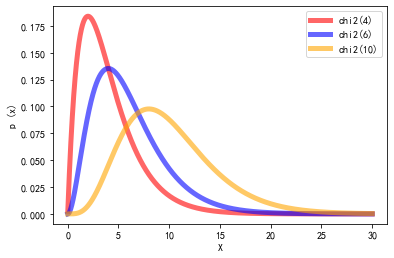

In [18]:
# 使用scipy计算pdf画图(非自定义函数)
from scipy.stats import chi2
x = np.linspace(0.01,30,10000)  
plt.plot(x, chi2.pdf(x,df=4), lw=5, alpha=0.6, label='chi2(4)', color='red')
plt.plot(x, chi2.pdf(x,df=6), lw=5, alpha=0.6, label='chi2(6)', color='blue')
plt.plot(x, chi2.pdf(x,df=10), lw=5, alpha=0.6, label='chi2(10)', color='orange')
plt.xlabel("X")
plt.ylabel("p (x)")
plt.legend()
plt.show()

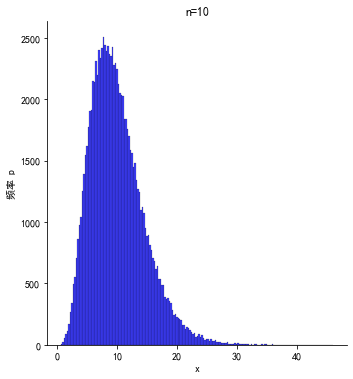

In [6]:
# 使用卡方分布的定义演示卡方分布
# 该密度函数的图像是取非负值的偏态分布， 其数学期望等于自由度n， 方差等于 2 倍自由度即2n
from scipy.stats import norm
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
n = 10
chi2_list = []
for i in range(100000):
    x_i = norm.rvs(loc=0,scale=1,size=10)
    chi2_T = np.sum(np.square(x_i))
    chi2_list.append(chi2_T)
sns.displot(chi2_list,color='blue')
plt.xlabel("x")
plt.ylabel("频率 p")
plt.title("n="+str(n))
plt.show()


4.2 F统计量与F分布

设随机变量 $X_{1} \sim \chi^{2}(m), X_{2} \sim \chi^{2}(n), X_{1}$ 与 $X_{2}$ 独立， 则称 $F=\frac{X_{1} / m}{X_{2} / n}$ 的分布是自由度为 $m$ 与 $n$ 的 $F$ 分布， 记为 $F \sim F(m, n)$， 其中 $m$ 称为分子自由度， $n$ 称为分母自由度。F分布的密度函数为：
$$
\begin{aligned}
p_{F}(y) &=\frac{\Gamma\left(\frac{m+n}{2}\right)\left(\frac{m}{n}\right)^{\frac{m}{2}} y^{\frac{m}{2}-1}\left(1+\frac{m}{n} y\right)^{-\frac{m+n}{2}}}{\Gamma\left(\frac{m}{2}\right) \Gamma\left(\frac{n}{2}\right)} \cdot
\end{aligned}
$$

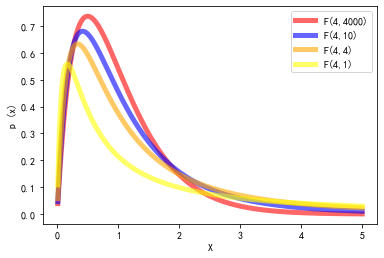

In [21]:
# 使用scipy与matplotlib绘制不同的m，n下的F分布的密度函数
from scipy.stats import f
x = np.linspace(0.01,5,10000)  
plt.plot(x, f.pdf(x,4,4000), lw=5, alpha=0.6, label='F(4,4000)',c='red')
plt.plot(x, f.pdf(x,4,10), lw=5, alpha=0.6, label='F(4,10)',c='blue')
plt.plot(x, f.pdf(x,4,4), lw=5, alpha=0.6, label='F(4,4)',c='orange')
plt.plot(x, f.pdf(x,4,1), lw=5, alpha=0.6, label='F(4,1)',c='yellow')
plt.xlabel("X")
plt.ylabel("p (x)")
plt.legend()
plt.show()

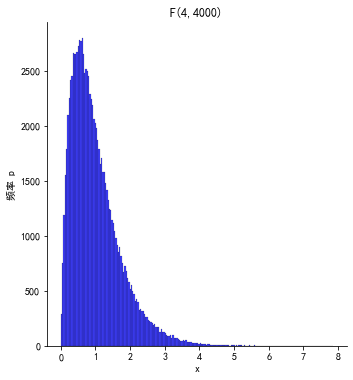

In [20]:
# 使用F统计量的定义演示：
from scipy.stats import norm
m,n = 4,4000
F_list = []
for i in range(100000):
    chi2_m_sample = np.sum(np.square(norm.rvs(loc=0,scale=1,size=m))) # 卡方m统计量
    chi2_n_sample = np.sum(np.square(norm.rvs(loc=0,scale=1,size=n))) # 卡方n统计量
    F_T = (chi2_m_sample/m) / (chi2_n_sample/n)  # # F（m，n）统计量
    F_list.append(F_T)
sns.displot(F_list,color='blue')
plt.xlabel("x")
plt.ylabel("频率 p")
plt.title("F(4,4000)")
plt.show()

4.3 t统计量与t分布

设随机变量 $X_{1}$ 与 $X_{2}$ 独立且 $X_{1} \sim N(0,1), X_{2} \sim \chi^{2}(n)$, 则称 $t=\frac{X_{1}}{\sqrt{X_{2} / n}}$ 的分布为自由度为 $n$ 的 $t$ 分布， 记为 $t \sim t(n)$。

 从下图可以看到：当自由度较大 $($ 如 $n \geqslant 30)$ 时, $t$ 分布可以用 $N(0,1)$ 分布近似（图中$t(100)$几乎与$N(0,1)$重合）。下面，我们使用样本均值和样本方差构造t统计量：

设 $x_{1}, x_{2}, \cdots, x_{n}$ 是来自正态分布 $N\left(\mu, \sigma^{2}\right)$ 的一个样本， $\bar{x}$ 与 $s^{2}$ 分别是该样本的样本均值与样本方差， 则有
$$
t=\frac{\sqrt{n}(\bar{x}-\mu)}{s} \sim t(n-1) 
$$

这个统计量的由来十分具有故事性：在1980年以前，统计学主要的工作时解决社会统计，如人口问题等，后来生物统计问题异军突起，这类问题的主要特点是：数据量一般较大，所用的方法大多数是以中心极限定理为依据的，因此由于中心极限定理总是会联系到正态分布，正态分布在那时候大行其道。皮尔逊认为：正态分布是上帝赐予人类唯一正确的分布类型。到了20世纪初期，越来越多农业、工业试验的统计数据，这些统计数据的特点是：数据量一般不大，没办法使用中心极限定理近似。1898年，酿酒化学技师戈塞特平时的工作接触的数据量很小，只有几个，他通过大量的实验数据发现：$t=\frac{\sqrt{n}(\bar{x}-\mu)}{s} \sim t(n-1)$ 的分布与标准正态分布$N(0,1)$并不一致，但是由于数学和统计学功底不够，并不能解决这个问题。于是，他到皮尔逊那里学习，着重研究少量数据的统计分析，在1908年终于以Student为笔名发表了有关论文，并提出：设 $x_{1}, x_{2}, \cdots, x_{n}$ 是来自正态分布 $N\left(\mu, \sigma^{2}\right)$ 的一个样本， $\bar{x}$ 与 $s^{2}$ 分别是该样本的样本均值与样本方差， 则有：$t=\frac{\sqrt{n}(\bar{x}-\mu)}{s} \sim t(n-1) $。

$t$ 分布的发现在统计学史上具有划时代的意义, 因为$t$分布的出现打破了正态分布一统天下的局面，$t$分布 开创了小样本统计推断的新纪元，小样本统计分析由此引起了广大统计科研工作者的重视。事实上，戈塞特的证明存在着漏洞，费希尔（Fisher）注意到这个问题并于 1922 年给出了此问题的完整证明。

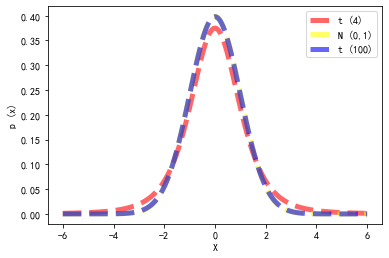

In [ ]:
# 使用scipy与matplotlib绘制不同的n下的t分布的密度函数
from scipy.stats import t
from scipy.stats import norm 
x = np.linspace(-6,6,10000)  
plt.plot(x, t.pdf(x,4),'--', lw=5, alpha=0.6, label='t (4)',color='red')
plt.plot(x, norm.pdf(x,loc=0,scale=1),'--', lw=5, alpha=0.6, label='N (0,1)',color='yellow')
plt.plot(x, t.pdf(x,100),'--', lw=5, alpha=0.6, label='t (100)',color='blue')
plt.xlabel("X")
plt.ylabel("p (x)")
plt.legend()
plt.show()

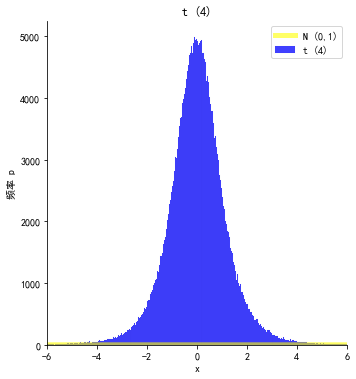

In [28]:
from scipy.stats import norm 
from scipy.stats import t 
t_list = []
for i in range(300000):
    mu,sigma2 = 0,1
    x_i = norm.rvs(loc=mu, scale=sigma2, size=5)
    x_mean = np.mean(x_i)
    x_s = np.std(x_i,ddof=1)
    t_T = np.sqrt(4)*(x_mean-mu) / x_s
    t_list.append(t_T)
sns.displot(t_list,color='blue',label='t (4)')
x = np.linspace(-6,6,10000)  
plt.plot(x, norm.pdf(x,loc=0,scale=1), lw=5, alpha=0.6, label='N (0,1)',c='yellow')
plt.xlabel("x")
plt.ylabel("频率 p")
plt.title("t (4)")
plt.xlim(-6,6)
plt.legend()
plt.show()

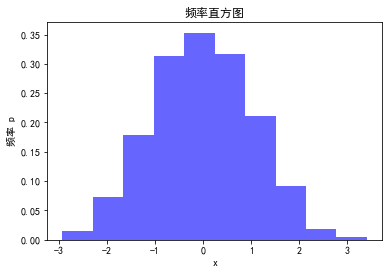

In [29]:
# 频率直方图
x_samples = np.random.randn(1000)
plt.hist(x_samples, bins=10,color='blue',alpha=0.6,density=True)  # bins=10代表10根柱子
plt.xlabel("x")
plt.ylabel("频率 p")
plt.title("频率直方图")
plt.show()

4.4 分布类型

$\chi^{2}$分布：$\chi^{2} = X_{1}^{2} + X_{2}^{2} + \cdots + X_{n}^{2}\sim\chi^{2}(n)$，其中$X_{1},X_{2}\cdots,X_{n},$相互独立，且同服从$N(0,1)$

$t$分布：$T = \frac{X}{\sqrt{Y/n}}\sim t(n)$ ，其中$X\sim N\left( 0,1 \right),Y\sim\chi^{2}(n),$且$X$，$Y$ 相互独立。

$F$分布：$F = \frac{X/n_{1}}{Y/n_{2}}\sim F(n_{1},n_{2})$，其中$X\sim\chi^{2}\left( n_{1} \right),Y\sim\chi^{2}(n_{2}),$且$X$，$Y$相互独立。

分位数：若$P(X \leq x_{\alpha}) = \alpha,$则称$x_{\alpha}$为$X$的$\alpha$分位数



4.5 正态总体的常用样本分布

设$X_{1},X_{2}\cdots, X_{n}$为来自正态总体$N(\mu,\sigma^{2})$的样本, $\overline{X} = \frac{1}{n}\sum_{i = 1}^{n}X_{i},S^{2} = \frac{1}{n - 1}\sum_{i = 1}^{n}{{(X_{i} - \overline{X})}^{2},}$则：

(1) $\overline{X}\sim N\left( \mu,\frac{\sigma^{2}}{n} \right){\ \ }$或者$\frac{\overline{X} - \mu}{\frac{\sigma}{\sqrt{n}}}\sim N(0,1)$

(2) $\frac{(n - 1)S^{2}}{\sigma^{2}} = \frac{1}{\sigma^{2}}\sum_{i = 1}^{n}{{(X_{i} - \overline{X})}^{2}\sim\chi^{2}(n - 1)}$

(3) $\frac{1}{\sigma^{2}}\sum_{i = 1}^{n}{{(X_{i} - \mu)}^{2}\sim\chi^{2}(n)}$

(4) ${\ \ }\frac{\overline{X} - \mu}{S/\sqrt{n}}\sim t(n - 1)$



4.6 重要公式与结论

(1) 对于$\chi^{2}\sim\chi^{2}(n)$，有$E(\chi^{2}(n)) = n,D(\chi^{2}(n)) = 2n;$

(2) 对于$T\sim t(n)$，有$E(T) = 0,D(T) = \frac{n}{n - 2}(n > 2)$；

(3) 对于$F\tilde{\ }F(m,n)$，有 $\frac{1}{F}\sim F(n,m),F_{a/2}(m,n) = \frac{1}{F_{1 - a/2}(n,m)};$

(4) 对于任意总体$X$，有 $E(\overline{X}) = E(X),E(S^{2}) = D(X),D(\overline{X}) = \frac{D(X)}{n}$



### 5.参数估计-点估计
**统计量的目的就是想使用样本信息取推断总体的信息**，而统计量只含有样本的信息，不含未知的总体参数。

总体是一个随机变量，使用随机变量的分布进行描述，在实际中我们感兴趣的是随机变量分布中的未知参数

如：全中国人的身高服从均值为$\mu$、方差为$\sigma^2$的正态分布$N(\mu, \sigma^2)$，而总体中的均值$\mu$、方差$\sigma^2$都是未知的，我们需要在总体中抽样，去估计总体中的未知参数均值$\mu$和方差$\sigma^2$

引入估计的概念：通过样本统计量对总体分布的未知参数进行估计。

估计的方法有点估计与区间估计

点估计希望使用一个数估计总体中的位置参数，如$\mu = 0$就是指使用一个数0去估计总体中的参数$\mu$，而0是由抽样后计算某个样本统计量得来的。

区间估计指的是使用一个区间估计总体中的参数，区间估计解决了点估计无法评价估计的精度的问题。

设 $x_{1}, x_{2}, \cdots, x_{n}$ 是来自总体的一个样本， 用于估计未知参数 $\theta$ 的统计量 $\hat{\theta}=\hat{\theta}\left(x_{1}, x_{2}, \cdots, x_{n}\right)$ 称为 $\theta$ 的估计量， 或称为 $\theta$ 的点估计， 简称估计。

点估计的方法有很多，矩估计, 极大似然估计, 贝叶斯估计等。

#### 5.1 矩估计

5.1.1 总体矩和中心矩

对于一个随机变量X来说，随机变量X的矩可以分为原点矩和中心矩，具体来说：

设 $X$ 为随机变量， $k$ 为正整数。 如果以下的数学期望都存在， 则称
$$
\mu_{k}=E\left(X^{k}\right)
$$
为 $X$ 的 $k$ 阶原点矩。 称
$$
\nu_{k}=E(X-E(X))^{k}
$$
为 $X$ 的 $k$ 阶中心矩。

显然，数学期望是随机变量的1阶原点矩，方差是随机变量的2阶中心矩。随机变量的矩是随机变量的一类数字特征，随机变量的原点矩刻画了随机变量$X$偏离原点$(0,0)$的程度，而中心矩描述了随机变量$X$偏离“中心”的程度，可以使用数学期望和方差做类比。

与此同时，一类常见的统计量就是样本矩，具体来说：
设 $x_{1}, x_{2}, \cdots, x_{n}$ 是样本， $k$ 为正整数， 则统计量
$$
a_{k}=\frac{1}{n} \sum_{i=1}^{n} x_{i}^{k}
$$
称为样本 $k$ 阶原点矩。 特别地， 样本一阶原点矩就是样本均值。 统计量
$$
b_{k}=\frac{1}{n} \sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{k}
$$
称为样本 $k$ 阶中心矩。 特别地， 样本二阶中心矩就是样本方差。

下面，我们来看看在python如何计算样本矩：



In [ ]:
# 假设总体是标准正态分布，求3阶原点矩和中心矩
from scipy.stats import norm
x_i = norm.rvs(loc=0, scale=1, size=10000)
a3 = np.mean(np.power(x_i,3))
b3 = np.mean(np.power((x_i-np.mean(x_i)), 3))
print("3阶原点矩：",a3)
print("3阶中心矩：",b3)

3阶原点矩： -0.013191708481228623
3阶中心矩： 0.008913149431390315


5.1.2 矩估计

使用样本矩（样本原点矩和样本中心矩）替换总体矩（原点矩和中心矩）

如：
- 使用样本均值$\bar{x}$替换总体均值$E(X)$、使用样本方差$s^2$替换总体方差$Var(X)$
- 使用样本均值$\bar{x}$估计总体均值$E(X)$、使用样本方差$s^2$估计总体方差$Var(X)$
- 用事件的频率估计事件的概率
- 使用样本分位数估计总体分位数


【例子】假设总体服从指数分布，其密度函数为
$$
p(x ; \lambda)=\lambda \mathrm{e}^{-\lambda x}, \quad x \geqslant 0
$$
从该总体中抽样1000个样本，估计总体分布的参数$\lambda$。

解：

$k=1$， 由于 $E(X)=1 / \lambda$，即 $\lambda=1 / E(X)$，因此，$\lambda$的矩估计为：$\hat{\lambda}=\frac{1}{\bar{x}} $

In [ ]:
# 假设真实值lambda = 5
from scipy.stats import expon
real_lmd = 5
x_i = np.random.exponential(scale=1/real_lmd, size=1000)
print("矩估计为：",1/np.mean(x_i))

矩估计为： 5.053072585673516


#### 5.2 极大似然估计

极大似然估计的思想非常有意思，充分利用了样本的二重性，即：可以把样本想象成黑盒子，打开前样本是一个随机变量，打开后就是确定的值。具体来说：极大似然估计就是利用已知的样本结果信息，反推最有可能（最大概率）导致这些样本结果出现的模型参数值。

求极大似然函数估计值的**一般步骤**：
>（1）写出似然函数
>（2）对似然函数取对数，并整理
>（3）求导数
>（4）解似然方程

下面举例子说明：

假设我们有一个罐子（总体），罐子里有黑白两色球，假设黑球为记为1，白球记为0，球的比例未知，假设黑球的比例为$p$，白球的比例时$1-p$。为了估计总体罐子的参数$p$，我们对总体进行抽样，采样的结果如下：
$$
1, 1, 0, 1, 1, 1, 0, 0, 1, 1
$$
为了使用我们的样本信息估计总体参数$p$，我们计算这组样本出现的概率（似然函数）
$$
\begin{gathered}
P(p) &= p\times p\times (1-p) \times p \times p \times p \times (1-p) \times (1-p) \times p \times p\\
&= p^7 \times (1-p)^3
\end{gathered}
$$
由于不同的$p$会导致样本发生的概率发生改变，可能是“冥冥之中自有天意”，有一股无形的力量迫使我们从总体中采样刚好采到这个样本，因此样本发生的概率应该是最大才对。接下来，我们需要把样本发生的概率最大化：
$$
max_p\quad P(p) = p^7 \times (1-p)^3
$$
由于直接求解$n$个连乘的式子是十分困难的，但是我们比较习惯求解加法的式子，因此可以使用对数把以上的式子$P(p)$简化为连加式子$ln(P(p))$（对数似然函数），即：
$$
ln(P(p)) = 7ln(p) \times 3ln(1-p)
$$
最大值的求解需要使用导数的知识，即导函数为0：
$$
\begin{gathered}
&\frac{d ln(P)}{d p} = 0\\
&\frac{7}{p}-\frac{3}{1-p} = 0\\
&p = 0.7
\end{gathered}
$$
求解的最大值对应的$p=0.7$就是我们所要估计的p。下面我们使用python求解：

In [31]:
# 使用sympy演示极大似然估计的案例
from sympy import *
p = Symbol('p')  #定义总体参数
P_p = p**7*(1-p)**3  # 定义似然函数
lnP_p = ln(P_p) # 化简为对数似然
d_ln_P = diff(lnP_p, p) # 求导函数
p_hat = solve(d_ln_P, p) # 导函数为0
print("p的极大似然估计为：",p_hat)


p的极大似然估计为： [7/10]


In [32]:
from sympy.abc import lamda
x_1,x_2,x_3,x_4,x_5 = symbols('x_1:6') # 定义多个样本变量
x_1,x_2,x_3,x_4,x_5 = 2, 3, 0.5, 5, 2
f_lmd = lamda*E**(-lamda*x_1) * lamda*E**(-lamda*x_2) * lamda*E**(-lamda*x_3) * lamda*E**(-lamda*x_4) * lamda*E**(-lamda*x_5) # 定义似然函数
ln_f_lmd = ln(f_lmd) # 定义对数似然函数
d_ln_f = diff(ln_f_lmd, lamda) # 求导
lmd_hat = solve(d_ln_f, lamda) # 导数为0
print("指数分布参数lamda的极大似然估计值为：",lmd_hat)
print("指数分布参数lamda的极大似然公式求解为：", 5 / (x_1+x_2+x_3+x_4+x_5))

指数分布参数lamda的极大似然估计值为： [0.400000000000000]
指数分布参数lamda的极大似然公式求解为： 0.4


#### 5.3 点估计的评价

5.3.1 无偏性

使用某个统计量估计总体参数时，由于样本具有随机性，统计量始终与总体参数有一定的差距，这种差距时而偏大，时而偏小，但是平均起来统计量与总体参数之间的差距为0。可以想像成一个箭靶，箭靶中心是总体参数，我们最想要的就是一击必中靶心，但是由于各种因素，我们每次实际的射击（统计量）与实际靶心有一定的差距，有时射出的箭位于靶心上方，有时射出的箭位于靶心的下方，但是平均起来这种差距会被抵消为0。即：

设 $\hat{\theta}=\hat{\theta}\left(x_{1}, x_{2}, \cdots, x_{n}\right)$ 是 $\theta$ 的一个估计， $\theta$ 的参数空间为 $\Theta$， 若对任意的 $\theta \in \Theta$， 有$E_{\theta}(\hat{\theta})=\theta,$则称 $\hat{\theta}$ 是 $\theta$ 的无偏估计。

同一个参数${\theta}$的无偏估计不一定唯一

5.3.2 有效性

对于同一个总体参数的估计统计量的构造方式多种多样，同时对于同一个总体参数的无偏估计也有很多个统计量进行估计，因此如何从众多的无偏估计统计量中选择合适的统计量估计总体参数呢？其实，最直观的方式是：如果该统计量围绕总体分布的参数值波动越小越好，因此波动越小，由于随机性导致的统计量每次估计总体分布参数时不会差别太大。波动可以使用方差来衡量，因此应该选择无偏估计的统计量中方差最小的统计量作为最有效的统计量。具体来说：

设 $\hat{\theta}_{1}, \hat{\theta}_{2}$ 是 $\theta$ 的两个无偏估计， 如果对任意的 $\theta \in \Theta$ 有
$\operatorname{Var}\left(\hat{\theta}_{1}\right) \leqslant \operatorname{Var}\left(\hat{\theta}_{2}\right),$且至少有一个 $\theta \in \Theta$ 使得上述不等号严格成立， 则称 $\hat{\theta}_{1}$ 比 $\hat{\theta}_{2}$ 有效。


5.3.3 无偏性和有效性的重要性(代码)

使用一个案例说明无偏性和有效性的重要性：

在三种估计方式中，由于标准正态分布的$\mu=0$，因此，使用样本均值和使用第一个样本估计正态总体$\mu$是无偏估计，而使用样本最小值估计正态总体$\mu$则是有偏的；在使用样本均值和使用第一个样本估计正态总体$\mu$的两种无偏估计方法中，使用样本均值估计正态总体$\mu$的方差显著小于使用样本最小值估计正态总体$\mu$。事实上，$Var(\bar{x}) = \frac{\sigma^2}{n}$而$Var(x_1) = \sigma^2$，n为样本量。因此，使用样本均值估计正态总体$\mu$总是无偏且有效的！

在正态分布$N(\mu, \sigma^2)$估计数学期望$\mu$时，使用极大似然估计的结果为$\bar{x}$。除此以外，我们也能使用第一个样本$x_1$估计$\mu$，当然我们也能使用样本统计量的最小值作为$\mu$的估计，下面我们使用python看看这几种方式的无偏性和有效性：

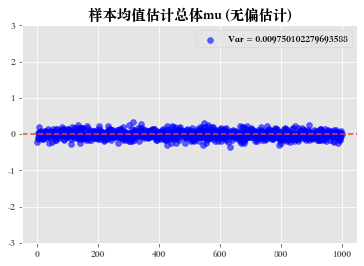

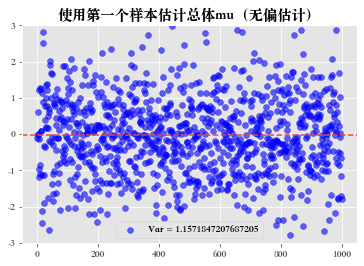

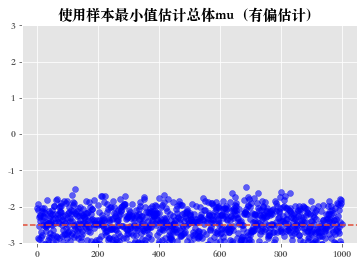

In [ ]:
# 使用三种估计统计量估计标准正态总体的参数mu=0，试验次数为1000次，每次抽100个样品
N = 1000
## 使用样本均值估计正态总体的参数mu
mean_list = []
for i in range(1000):
    x_i = np.random.randn(100)
    x_mean = np.mean(x_i)
    mean_list.append(x_mean)
E_x_mean = np.mean(mean_list)
Var_x_mean = np.var(mean_list)
plt.scatter(np.arange(N)+1, np.array(mean_list), color='b', alpha=0.6, label='Var = '+str(Var_x_mean))
plt.axhline(y=E_x_mean, ls='--')
plt.ylim(-3,3)
plt.title("样本均值估计总体mu (无偏估计)")
plt.legend()
plt.show()

## 使用第一个样本估计正态总体的参数mu
x1_list = []
for i in range(1000):
    x_i = np.random.randn(100)
    x1 = x_i[0]
    x1_list.append(x1)
E_x_1 = np.mean(x1_list)
Var_x_1 = np.var(x1_list)
plt.scatter(np.arange(N)+1, np.array(x1_list), color='b', alpha=0.6, label='Var = '+str(Var_x_1))
plt.axhline(y=E_x_1, ls='--')
plt.ylim(-3,3)
plt.title("使用第一个样本估计总体mu（无偏估计）")
plt.legend()
plt.show()

## 使用最小值估计正态总体的参数mu
xmin_list = []
for i in range(1000):
    x_i = np.random.randn(100)
    x_min = np.min(x_i)
    xmin_list.append(x_min)
E_x_min = np.mean(xmin_list)
plt.scatter(np.arange(N)+1, np.array(xmin_list), color='b', alpha=0.6)
plt.axhline(y=E_x_min, ls='--')
plt.ylim(-3,3)
plt.title("使用样本最小值估计总体mu（有偏估计）")
plt.show()

### 6.参数估计-区间估计
参数的点估计是使用一个具体的数值（统计量）估计总体分布的参数值，这样做的有点就是方便计算与方便使用，但是点估计的精度如何，点估计本身是无法回答的。解决这个问题一个比较复杂的是方法是：构造统计量的分布，即抽样分布，然后使用一个区间估计总体分布的参数，这就是区间估计。 

设 $\theta$ 是总体的一个参数，其参数空间为 $\Theta, x_{1}, x_{2}, \cdots, x_{n}$ 是来自该总体的样本, 对给定的一个 $\alpha(0<\alpha<1)$， 假设有两个统计量 $\hat{\theta}_{L}=\hat{\theta}_{L}\left(x_{1}, x_{2}, \cdots, x_{n}\right)$ 和 $\hat{\theta}_{U}=$ $\hat{\theta}_{U}\left(x_{1}, x_{2}, \cdots, x_{n}\right)$， 若对任意的 $\theta \in \Theta$， 有
$$
P_{\theta}\left(\hat{\theta}_{L} \leqslant \theta \leqslant \hat{\theta}_{U}\right) \geqslant 1-\alpha,
$$
则称随机区间 $\left[\hat{\theta}_{L}, \hat{\theta}_{V}\right]$ 为 $\theta$ 的置信水平为 $1-\alpha$ 的**置信区间**，或简称 $\left[\hat{\theta}_{L}, \hat{\theta}_{V}\right]$ 是 $\theta$ 的 $1-\alpha$ 置信区间， $\hat{\theta}_{L}$ 和 $\hat{\theta}_{U}$ 分别称为 $\theta$ 的 (双侧) 置信下限和置信上限。

通过样本构造一个置信区间, 使用bootstrap方法快速构造置信区间

假设我们想要通过某个统计量T估计总体参数，置信水平为$1-\alpha$。从总体中抽样$x_1,x_2,...,x_n$，我们只需要在样本中继续抽样（重抽样），每次抽样计算一次统计量T，这样就可以构造一个抽样分布，取抽样分布的$\frac{\alpha}{2}$分位数点和$1-\frac{\alpha}{2}$分位数点作为区间左右边界即可。


In [ ]:
# 使用bootstrap方法计算N(0,1)的mu的置信区间：样本量为1000，重抽样样本量为500, 重抽样的次数为100000次
T_list = []
N, N_re = 1000, 500
total_times = 10000
alpha = 0.05
x_i = np.random.randn(N)  # 抽样1000个
for i in range(total_times):
    x_re = np.random.choice(x_i, N_re, replace=True) # 从样本中重抽样
    T = np.mean(x_re)
    T_list.append(T)
left = np.percentile(np.array(T_list), 100*alpha/2)
right = np.percentile(np.array(T_list), 100*(1-alpha/2))
print("正态总体的mu的置信区间为：["+str(left)+", "+str(right)+"]")


正态总体的mu的置信区间为：[-0.12126556938540638, 0.05236967393850865]


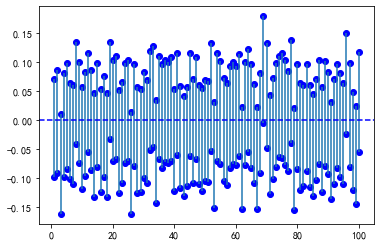

In [2]:
# 探索置信度1-alpha的含义：
import numpy as np
from matplotlib import pyplot as plt
# plt.rcParams['font.sans-serif']=['SimHei']
# plt.rcParams['axes.unicode_minus'] = False

def get_confident_interval(x_i):
    T_list = []
    N, N_re = 1000, 500
    total_times = 10000
    alpha = 0.05
    for i in range(total_times):
        x_re = np.random.choice(x_i, N_re, replace=True) # 从样本中重抽样
        T = np.mean(x_re)
        T_list.append(T)
    left = np.percentile(np.array(T_list), 100*alpha/2)
    right = np.percentile(np.array(T_list), 100*(1-alpha/2))
    return {'left':left, 'right':right}

left_right_list = []  #100个置信区间的列表
for i in range(100):
    x_i = np.random.randn(1000) #每次抽样1000个样本
    T_i = get_confident_interval(x_i)
    left_right_list.append(T_i)
for i in range(len(left_right_list)):
    plt.vlines(x=i+1, ymin=left_right_list[i]['left'], ymax=left_right_list[i]['right'])
    plt.scatter(np.array([i+1]*2),np.array([left_right_list[i]['left'],left_right_list[i]['right']]),color='blue')
plt.axhline(y=0, ls='--', color='b')
plt.show()

### 7.假设检验

7.1 假设检验的基本概念

[参考链接: 假设检验](https://zhuanlan.zhihu.com/p/86178674)
- **假设检验**: 是先对总体参数提出一个假设值，然后利用样本信息判断这一假设是否成立 (我们需要对结果进行假设，然后拿样本数据去验证这个假设)

- **要假设检验的原因**: 当遇到对一个总体数据进行评估的问题，但我们又不能直接统计全部数据，这时就需要从总体中抽出一部分样本，用样本来估计总体情况。

- 假设检验的假设

  > 原假设，也叫零假设，用H0表示。原假设一般是统计者想要拒绝的假设。原假设的设置一般为：等于=、大于等于>=、小于等于<=。

  > 备择假设，用H1表示。备则假设是统计者想要接受的假设。备择假设的设置一般为：不等于、大于>、小于<。

- 例子
  
  在进行假设检验时，我们希望接受版本2的假设，想拒绝接受版本1的假设。所以我们的假设设置为：H0 ：μ版本1 >= μ版本2 ，H1 : μ版本1 < μ版本2。

- 弃真错误、取伪错误
  
  > 我们通过样本数据来判断总体参数的假设是否成立，但样本时随机的，因而有可能出现小概率的错误。这种错误分两种，一种是弃真错误，另一种是取伪错误。

  > 弃真错误也叫第I类错误或α错误：它是指 原假设实际上是真的，但通过样本估计总体后，拒绝了原假设。明显这是错误的，我们拒绝了真实的原假设，所以叫弃真错误，这个错误的概率我们记为α。这个值也是显著性水平，在假设检验之前我们会规定这个概率的大小。

  > 取伪错误也叫第II类错误或β错误：它是指 原假设实际上假的，但通过样本估计总体后，接受了原假设。明显者是错误的，我们接受的原假设实际上是假的，所以叫取伪错误，这个错误的概率我们记为β。

  > 原假设备被拒绝，如果出错的话，只能犯弃真错误，而犯弃真错误的概率已经被规定的显著性水平所控制了。这样对统计者来说更容易控制，将错误影响降到最小。

- 显著性水平

  > 显著性水平是指当原假设实际上正确时，检验统计量落在拒绝域的概率，简单理解就是犯弃真错误的概率。这个值是我们做假设检验之前统计者根据业务情况定好的。显著性水平α越小，犯第I类错误的概率自然越小，一般取值：0.01、0.05、0.1等

- 拒绝域

  > 拒绝域是由显著性水平围成的区域

  > 拒绝域的功能主要用来判断假设检验是否拒绝原假设的。如果样本观测计算出来的检验统计量的具体数值落在拒绝域内，就拒绝原假设，否则不拒绝原假设。给定显著性水平α后，查表就可以得到具体临界值，将检验统计量与临界值进行比较，判断是否拒绝原假设。
  
  <img src="./images/3.png" width="600"/>



7.2 假设检验的步骤

描述步骤1
- 提出原假设与备择假设
- 从所研究总体中出抽取一个随机样本
- 构造检验统计量
- 根据显著性水平确定拒绝域临界值
- 计算检验统计量与临界值进行比较

描述步骤2
- 提出原假设与备择假设；
- 选择合适的统计量解决检验问题；
- 写出拒绝域的形式和显著性水平（一类错误的概率$\alpha$）；
- 计算拒绝域边界的统计量分布的分位数；
- 观察统计量值是否位于拒绝域，位于拒绝域则拒绝原假设，否则接受原假设。

为了介绍假设检验的步骤，我们将使用一个例子给大家讲明白！某生产肉类的工厂生产肉类的质量服从正态分布$N(\theta, 1)$（总体），其中$\theta$设计值不低于1kg。为了保证肉类没有偷工减料，工厂每天都要对肉类的生产质量做抽样检查，检查肉类的平均质量不低于1kg。某天，从生产的肉类产品抽查10个产品，测量其质量为$x_1,x_2,...,x_{10}$，样本均值为$\bar{x} = 0.96$ kg，问该天生产的肉类是否偷工减料？

分析：

（2.1）建立假设：

我们需要回答的问题是：命题“肉类的平均质量不低于1kg”回答“是”还是“否”？因此回答该命题需要正确需要确定以下两个集合：
$$
\Theta_{0}=\{\theta: \theta \geqslant 1\}, \quad \Theta_{1}=\{\theta: \theta<1\}
$$
命题成立对应于$\theta \in \Theta_{0}$，而命题不成立对应于$\theta \in \Theta_{1}$。

因此，假设就简化为：$H_{0}: \theta \in \Theta_{0} \quad \text{vs} \quad H_{1}: \theta \in \Theta_{1}$，用以上案例来说就是$H_{0}: \theta \in \Theta_{0}=\{\theta: \theta \geqslant 1\} \quad \text{vs}  \quad H_{1}: \theta \in \Theta_{1}=\{\theta: \theta<1\}$，简写为：
$$
H_{0}: \theta \geqslant 1 \text { vs } H_{1}: \theta<1
$$
（2.2）选择统计量并给出拒绝域的形式：

问题的原假设$H_0$与备择假设$H_1$是关于总体的假设，我们需要使用样本信息推断总体的假设是否是正确的，老套路就是使用统计量将所有样本的信息汇总成一个具体的数值，如：$x_1,x_2,...,x_n$浓缩成$\bar{x}$。我们可以想像成有两个空间，一个能让我们通过样本信息拒绝原假设的拒绝域$W$，另一个是让我们通过样本信息接受原假设的接受域$\bar{W}$，拒绝域$W$和接受域$\bar{W}$都是可以通过样本信息构造出来的。因此，如果（检验）统计量落在拒绝域$W$则拒绝原假设，相反如果落在接受域$\bar{W}$则接受原假设，但是拒绝域$W$和接受域$\bar{W}$的构造方式目前还未知！接下来，我们使用上述的例子构造拒绝域：

由于我们的原假设是正态总体的数学期望$\theta \ge 1$，因此样本均值$\bar{x}$是一个不错的统计量。如果正态总体的数学期望$\theta$越大，$\bar{x}$越大则支持原假设的力度就会越大，反之$\bar{x}$越小则越拒绝原假设。因此，当$\bar{x}$小到一定的程度，就拒绝原假设，拒绝域的形式也随之出来：
$$
W=\left\{\left(x_{1}, x_{2}, \cdots, x_{n}\right): \bar{x} \leqslant c\right\}=\{\bar{x} \leqslant c\}
$$
其中，$c$是未确定的。

当拒绝域确定以后，如果某次的样本统计量位于拒绝域$W$则拒绝原假设，如果某次的统计量位于接受域$\bar{W}$则接受原假设。
（2.3）选择显著性水平：

由于样本具有随机性，因此每次抽样的统计量的值都不一样，因此某次抽样的样本统计量可能会位于拒绝域，也有可能位于接受域。换句话说，由于样本的随机性，该次检验可能会犯错，犯错的类型有两种：
| 观测数据情况 | 总 体 情 况 |  |
| :---: | :---: | :---: |
|  | $H_{(0)}$ 为真 | $H_{(1)}$ 为真 |
| $(x_{(1)},x_{(2)},\cdots,x_{(n)})\in W$ | 犯第一类错误 | 正确 |
| $(x_{(1)},x_{(2)},\cdots,x_{(n)})\in \bar{W}$ | 正确 | 犯第二类错误 |

当 $\theta \in \Theta_{0}$ 时， 样本由于随机性却落人了拒绝域 $W$， 于是我们采取了拒绝 $H_{0}$ 的错误决策， 称这样的错误为第一类错误。

当 $\theta \in \Theta_{1}$ 时， 样本却落人了接受域 $\bar{W}$， 于是我们采取了接受 $H_{0}$ 的错误决策， 称这样的错误为第二类错误。

既然会犯两类错误，我们可以计算犯两类错误的概率，即：
   - 犯第一类错误概率: $\alpha(\theta)=P_{\theta}\{\boldsymbol{X} \in W\}, \theta \in \Theta_{0}$。
   - 犯第二类错误概率: $\beta(\theta)=P_{\theta}\{X \in \bar{W}\}, \theta \in \Theta_{1}$。

接下来的任务就很简单啦，能不能同时减少两类错误的概率呢？答案是不能，这两类错误相互制约，一类错误的增加必然减少另一类错误的减少。因此，我们选择仅限制一类错误发生的概率，如：令$\alpha(\theta) = \alpha \le 0.05$
（2.4）给出拒绝域：

由于我们需要限制一类错误的概率小于等于0.05，即：$\alpha(\theta)=P_{\theta}\{\boldsymbol{X} \in W\} \le 0.05$，而拒绝域为$W=\left\{\left(x_{1}, x_{2}, \cdots, x_{n}\right): \bar{x} \leqslant c\right\}=\{\bar{x} \leqslant c\}$，因此只需要让$c$等于$\bar{x}$的分布的0.05分位数点即可。



In [ ]:
# python模拟以上的假设检验
from scipy.stats import norm
x_i = np.array([1.0, 0.85, 0.90, 0.98, 0.96, 1.0, 0.97, 0.98, 0.98, 0.98]) # 从当天生产的肉类总体中抽样10个
x_mean = np.mean(x_i) # 构造样本均值统计量
c = norm(loc=1, scale=np.sqrt(1/10)).ppf(0.05)  # 总体N(theta, 1)，则样本均值的抽样分布为N(theta, 1/n)，n为样本量
print("样本均值为：",x_mean)
print("拒绝域为：（-inf， "+str(c)+"]")
print("x_mean位于接受域，接受原假设！")

样本均值为： 0.9600000000000002
拒绝域为：（-inf， 0.4798516121244424]
x_mean位于接受域，接受原假设！


7.3 正态总体参数的假设检验

在现实生活中，正态分布都是一个十分重要的分布，很多实际的数学模型都是建立在正态分布的基础上的，因此对正态分布的参数$\mu$和$\sigma^2$的检验就十分重要。下面，我们对正态总体的参数$\mu$和$\sigma^2$的各种检验做讨论：



7.3.1 单个正态总体均值的检验

设 $x_{1}, x_{2}, \cdots, x_{n}$ 是来自 $N\left(\mu, \sigma^{2}\right)$ 的样本，关于 $\mu$ 的检验问题有以下三种:

I $H_{0}: \mu \leqslant \mu_{0}$ vs $H_{1}: \mu>\mu_{0}$,

II $H_{0}: \mu \geqslant \mu_{0}$ vs $H_{1}: \mu<\mu_{0}$,

III $H_{0}: \mu=\mu_{0}$ vs $H_{1}: \mu \neq \mu_{0}$,

其中 $\mu_{0}$ 是已知常数。 由于正态总体含两个参数，而总体方差 $\sigma^{2}$ 是否已知对检验会产生很大影响，因此下面我们将分成方差已知和方差未知两种情况：

（a）$\sigma=\sigma_{0}$ 已知时的 $u$ 检验：
- 写出原假设与备择假设：$H_{0}: \mu \leqslant \mu_{0}$ vs $H_{1}: \mu>\mu_{0}$
- 构造合适的统计量：$u=\frac{\bar{x}-\mu_{0}}{\sigma_{0} / \sqrt{n}} ～ N(0,1)$。
- 写出拒绝域的形式：$W_{1}=\left\{\left(x_{1}, x_{2}, \cdots, x_{n}\right): u \geqslant c\right\}$，取$\alpha=0.05$；
- 计算统计量分布的分位数：$u_{1-\alpha} = u_{0.95}$
- 计算样本统计量，并观察统计量是否落在拒绝域。

【例子】某条公路上的汽车速度是服从正态分布$N(\mu, 0.4^2)$的随机变量，现在从这条公路上随机抽样10辆车，记录速度分别为：
$$
60, \quad 72, \quad 67, \quad 89, \quad 90, \quad 100, \quad 67, \quad 76, \quad 87, \quad78
$$
附近居民猜测此公路的速度为65，问是否能接受这个猜测。

解：
- 写出原假设与备择假设：$H_{0}: \mu=65 \quad$ vs $\quad H_{1}: \mu \neq 65$；
- 构造合适的统计量：$u=\frac{\bar{x}-65}{0.4 / \sqrt{10}} ～ N(0,1)$；
- 写出拒绝域的形式：$W = \{u \le u_{\alpha/2},\quad u \ge u_{1-\alpha/2} \},\quad\alpha=0.05$
- 计算统计量分布的分位数：$u_{1-\alpha/2} = u_{0.975}=1.96, \quad u_{\alpha/2} = u_{0.025}=-1.96$
- 计算样本统计量$u = \frac{78.6-65}{0.4 / \sqrt{10}} = 107.517$，位于拒绝域，拒绝原假设！（认为不能接受居民的猜测。）

（b）$\sigma$未知的单样本t检验：

u检验（z检验）完成的是当总体方差已知条件下的单个正态总体均值的检验，在实际中大多数情况下总体方差都是未知的，因此当总体方差未知时，u检验（z检验）将失效，取而代之的是t检验。下面以一个例子说明t检验的基本流程：


【例子】某工厂生产以发光产品，发光产品的发光时长服从正态分布$N(\mu, \sigma^2)$，产品的发光时长设定均值为250h。现在从一批产品中抽取10个产品，测得发光时长为（单位为：h）：
$$
248.8,\quad 249.2,\quad 250.7,\quad 251.2,\quad 248.0,\quad 253.0,\quad 248.9,\quad 250.2,\quad 251.2,\quad 249.2\quad
$$
问该厂的发光产品是否符合要求？

解：由于问题想检验正态总体的均值，而且方差未知，因此z（u）检验失效，应该使用t检验：
- 写出原假设与备择假设：$H_{0}: \mu \ge 250$ vs $H_{1}: \mu< 250$
- 构造合适的统计量：$t=\frac{\bar{x}-\mu_{0}}{s / \sqrt{n}} =  \frac{\bar{x} - 250}{1.503 / \sqrt{10}} ～ t(9)$；
- 写出拒绝域的形式：$W_{1}=\left\{\left(x_{1}, x_{2}, \cdots, x_{n}\right): u \leqslant c\right\}$，取$\alpha=0.05$；
- 计算统计量分布的分位数：$u_{\alpha} = u_{0.05} = 1.833$
- 计算样本统计量$t = \frac{250.04- 250}{1.503 / \sqrt{10}} = 0.0799$，并观察统计量是否落在拒绝域。

In [ ]:
# 使用python模拟u检验：
from scipy.stats import norm
mu_0, sigma= 65, 0.4
x_i = np.array([60, 72, 67, 89, 90, 100, 67, 76, 87, 78])  #样本
u_T = (np.mean(x_i) - mu) / (sigma / np.sqrt(len(x_i))) # 计算样本统计量
left = norm(loc=0, scale=1).ppf(0.025)
right = norm(loc=0, scale=1).ppf(0.975)
print("拒绝域为：["+str(left)+","+str(right)+"]")
print("u统计量为：",u_T)
print("u_T位于拒绝域，拒绝原假设！")

拒绝域为：[-1.9599639845400545,1.959963984540054]
u统计量为： 621.3875602230866
u_T位于拒绝域，拒绝原假设！


In [ ]:
# 使用python模拟单样本t检验
from scipy.stats import t
mu_0 = 250
x_i = np.array([248.8, 249.2, 250.7, 251.2, 248.0, 253.0, 248.9, 250.2, 251.2, 249.2]) # 样本
t_T = (np.mean(x_i)-mu_0)/(np.std(x_i, ddof=1)/np.sqrt(len(x_i)-1)) # 样本统计量
right = t(len(x_i)-1).ppf(0.05)
print("拒绝域为：(-inf, "+str(right)+"]")
print("t统计量为：",t_T)
print("t_T位于接受域，不能拒绝原假设！")

拒绝域为：(-inf, -1.8331129326536337]
t统计量为： 0.07985422656616525
t_T位于接受域，不能拒绝原假设！


In [ ]:
# 使用scipy进行单样本t检验
from scipy.stats import ttest_1samp
x_i = np.array([248.8, 249.2, 250.7, 251.2, 248.0, 253.0, 248.9, 250.2, 251.2, 249.2]) # 样本
t_T, p_value = ttest_1samp(x_i, popmean=250, alternative="less") # popmean:总体的期望， alternative={‘two-sided’（双侧）, ‘less’（左侧）, ‘greater’（右侧）} ； 返回：t统计量和p值
print("p = ", p_value)
print("由于p>0.05，不能拒绝原假设！")

p =  0.5326195568016787
由于p>0.05，不能拒绝原假设！


7.3.2 两个正态总体均值差的检验

（a）$\sigma_{1}, \sigma_{2}$ 已知时的两样本 $u$ 检验：

【例子】假设现在公司的网站需要修复一个bug，假设公司网站的每个人的浏览时长服从正态分布，且假设修复bug前后方差均为0.4，现在抽取修复bug前的10个客户以及修复之后的10个客户样本，并且观察样本的网站浏览时长，样本如下：
- 修复前（单位h）：$2.2、3.1、2.5、2.8、3.0、5.0、4.3、1.8、0.2、1.0$；
- 修复后（单位h）：$3.2、2.8、2.2、1.4、4.4、3.4、6.4、4.0、3.9、2.1$；

请问：修复bug前后，用户在网站的浏览时长是否发生了显著变化？

解：

这个问题涉及两个总体，修复bug前后的客户总体，我们需要比较两组总体的浏览网站时长的均值是否发生显著改变，因此，问题可以抽象成如下：

设 $x_{1}, x_{2}, \cdots, x_{m}$ 是来自正态总体 $N\left(\mu_{1}, \sigma_{1}^{2}\right)$ 的样本， $y_{1}, y_{2}, \cdots, y_{n}$ 是来自另一个正态总体 $N\left(\mu_{2}, \sigma_{2}^{2}\right)$ 的样本（$\sigma_1^2$与$\sigma_2^2$已知）， 两个样本相互独立。 
- 因此，我们的假设是：
$$
H_{0}: \mu_{1}-\mu_{2}=0 \quad \text { vs } \quad H_{1}: \mu_{1}-\mu_{2} \neq 0
$$
- 由于$\bar{x}-\bar{y} \sim N\left(\mu_{1}-\mu_{2}, \frac{\sigma_{1}^{2}}{m}+\frac{\sigma_{2}^{2}}{n}\right)$，因此统计量可以设置为：
$$
u=\frac{\bar{x}-\bar{y}}{\sqrt{\frac{\sigma_{1}^{2}}{m}+\frac{\sigma_{2}^{2}}{n}}}～N(0,1)
$$
- 拒绝域为：$W_{1}=\left\{u \geqslant u_{1-\alpha/2}\right\}$与$\left\{u \leqslant u_{\alpha/2}\right\}$，假设显著性水平$\alpha = 0.05$
- 计算样本统计量，观察是否位于拒绝域，判断是否拒绝原假设。

（b）$\sigma$ 未知时的两样本 $t$ 检验：

还是以刚刚为例子：假设现在公司的网站需要修复一个bug，假设公司网站的每个人的浏览时长服从正态分布，现在抽取修复bug前的10个客户以及修复之后的10个客户样本，并且观察样本的网站浏览时长，样本如下：
- 修复前（单位h）：$2.2、3.1、2.5、2.8、3.0、5.0、4.3、1.8、0.2、1.0$；
- 修复后（单位h）：$3.2、2.8、2.2、1.4、4.4、3.4、6.4、4.0、3.9、2.1$；

请问：修复bug前后，用户在网站的浏览时长是否发生了显著变化？

当总体方差未知时，情况就会变得十分复杂，在这里需要说明的是：
- 当总体方差未知，但相等时，则统计量可以取：$t=\frac{(\bar{x}-\bar{y})-\left(\mu_{1}-\mu_{2}\right)}{s_{w} \sqrt{\frac{1}{m}+\frac{1}{n}}} \sim t(m+n-2)$，其中$s_{w}^{2}=\frac{1}{m+n-2}\left[\sum_{i=1}^{m}\left(x_{i}-\bar{x}\right)^{2}+\sum_{i=1}^{n}\left(y_{i}-\bar{y}\right)^{2}\right]$，其他过程与（a）不变；
- 当总体方差未知且不相等时，可以使用Welch's t-test，统计量可以取$t = \frac{\bar{x}-\bar{y}}{\sqrt{\frac{S_{x}^{2}}{n}+\frac{S_{y}^{2}}{m}}}～t(u),\quad u=\frac{\left(\frac{S_{X}^{2}}{n}+\frac{S_{Y}^{2}}{m}\right)^{2}}{\frac{S_{X}^{4}}{n^{2}(n-1)}+\frac{S_{Y}^{4}}{m^{2}(m-1)}}$（近似服从）。

In [ ]:
# 使用python进行两个正态总体的均值差检验
from scipy.stats import norm 
sigma2_1 = sigma2_2 = 0.4
x_i = np.array([2.2, 3.1, 2.5, 2.8, 3.0, 5.0, 4.3, 1.8, 0.2, 1.0]) # 修复前的样本
y_i = np.array([3.2, 2.8, 2.2, 1.4, 4.4, 3.4, 6.4, 4.0, 3.9, 2.1]) # 修复后的样本
m, n = len(x_i), len(y_i)  # 样本数
u_T = (np.mean(x_i) - np.mean(y_i)) / np.sqrt(sigma2_1/m + sigma2_2/n)  #计算检验统计量
left = norm(loc=0, scale=1).ppf(0.025)  #拒绝域左边界
right = norm(loc=0, scale=1).ppf(0.975) # 拒绝域右边界
print("样本统计量为：", u_T)
print("拒绝域为：(-inf, "+str(left)+"]与["+str(right)+", +inf)")
print("样本统计量位于拒绝域，拒绝原假设！")


样本统计量为： -2.793071785686863
拒绝域为：(-inf, -1.9599639845400545]与[1.959963984540054, +inf)
样本统计量位于拒绝域，拒绝原假设！


In [ ]:
# 使用python的scipy进行方差未知时，两个正态总体的均值差检验
from scipy.stats import ttest_ind
x_i = np.array([2.2, 3.1, 2.5, 2.8, 3.0, 5.0, 4.3, 1.8, 0.2, 1.0]) # 修复前的样本
y_i = np.array([3.2, 2.8, 2.2, 1.4, 4.4, 3.4, 6.4, 4.0, 3.9, 2.1]) # 修复后的样本
m, n = len(x_i), len(y_i)  # 样本数
t_T, p_value = ttest_ind(x_i, y_i, equal_var=False, alternative='two-sided') # equal_var=True默认同方差， alternative={‘two-sided’（双侧）, ‘less’（左侧）, ‘greater’（右侧）} ； 返回：t统计量和p值
print("p值为：",p_value)
print("p>0.05, 则不能拒绝原假设！")

p值为： 0.22988282456317705
p>0.05, 则不能拒绝原假设！


7.3.3 正态总体方差的检验

（a）单个正态总体方差的 $\chi^{2}$ 检验：

【例子】假设你是一位出色的股票分析师，你物色了一家具有升值潜力的上市公司，但是你不希望承受太大的风险，因此你希望该公司的股票价格不会发生太大的波动，价格的方差在一定的数值以内。现在，假设股票价格服从正态分布，你选取了过去十天的股票价格：
$$
23.3,\quad 24.7,\quad 23.1,\quad 19.4,\quad 18.9,\quad 20.3,\quad 24.9,\quad 30.2,\quad 19.0,\quad 20.9\quad
$$
你希望该股票的价格方差不大于2，请问该股票满足吗？

解：

设 $x_{1}, x_{2}, \cdots, x_{n}$ 是来自 $N\left(\mu, \sigma^{2}\right)$ 的样本，因此：
- 假设：$H_{0}: \sigma^{2} \leqslant \sigma_{0}^{2} \quad$ vs $\quad H_{1}: \sigma^{2}>\sigma_{0}^{2},\quad \sigma_0^2 = 2$
- 统计量：$(n-1) s^{2} / \sigma_{0}^{2} ～ \chi^2(n-1)$
- 拒绝域为：$W_{1}=\left\{\chi^{2} \geqslant \chi_{1-\alpha}^{2}(n-1)\right\}$，假设显著性水平$\alpha = 0.05$
- 计算样本统计量，观察是否位于拒绝域，判断是否拒绝原假设。

（b）两个正态总体方差比的 $F$ 检验：

【例子】你现在还是一位出色的股票分析师，你挑选了两家同行业都很优秀的股票，你想对比下它们之间的风险谁大谁小？因此，你收集了两家股票前10天的股票价格：
$$
\text{A公司：}23.3,\quad 24.7,\quad 23.1,\quad 19.4,\quad 18.9,\quad 20.3,\quad 24.9,\quad 30.2,\quad 19.0,\quad 20.9\quad \\
\text{B公司：}34.1,\quad  43.2,\quad 31.1,\quad 12.4,\quad 36.9,\quad 21.3,\quad 39.9,\quad 20.2,\quad 39.0,\quad 12.2\quad \\
$$
因此，你想看看是否A公司的股价方差显著大于B公司呢？

解：

设 $x_{1}, x_{2}, \cdots, x_{m}$ 是来自 $N\left(\mu_{1}, \sigma_{1}^{2}\right)$ 的样本， $y_{1}, y_{2}, \cdots, y_{n}$ 是来自 $N\left(\mu_{2}, \sigma_{2}^{2}\right)$ 的样本，因此：
- 假设：$H_{0}: \sigma_{1}^{2} \geqslant \sigma_{2}^{2}$ vs $H_{1}: \sigma_{1}^{2}<\sigma_{2}^{2}$
- 统计量：$F=\frac{s_{x}^{2}}{s_{y}^{2}}～F(m-1, n-1)$
- 拒绝域：$W_{\mathbb{I}}=\left\{F \leqslant F_{\alpha}(m-1, n-1)\right\}$，显著性水平假设为：$\alpha=0.05$
- 计算样本统计量，观察是否位于拒绝域，判断是否拒绝原假设。

In [ ]:
# 使用python进行单个正态总体的方差检验
from scipy.stats import chi2
sigma0_2 = 2.0
x_i = np.array([23.3, 24.7, 23.1, 19.4, 18.9, 20.3, 24.9, 30.2, 19.0, 20.9]) # 样本
n = len(x_i) # 样本量
chi_T = (n-1)*np.std(x_i, ddof=1) / sigma0_2 #检验统计量
W_right = chi2(df = n-1).ppf(0.95) #拒绝域的边界
print("检验统计量为：",chi_T)
print("拒绝域为：["+str(W_right)+", +inf)")
print("统计量位于接受域，不能拒绝原假设！")

检验统计量为： 15.95234308808584
拒绝域为：[16.918977604620448, +inf)
统计量位于接受域，不能拒绝原假设！


In [ ]:
# 使用python做两个正态总体方差比的 $F$ 检验：
from scipy.stats import f
x_i = np.array([23.3, 24.7, 23.1, 19.4, 18.9, 20.3, 24.9, 30.2, 19.0, 20.9]) # 样本X
y_i = np.array([34.1, 43.2, 31.1, 12.4, 36.9, 21.3, 39.9, 20.2, 39.0, 12.2]) # 样本Y
m,n = len(x_i), len(y_i) # 样本量
F_T = np.std(x_i, ddof=1) / np.std(y_i, ddof=1) #检验统计量
W_left = f(dfn=m-1, dfd=n-1).ppf(0.05)
print("统计量为：", F_T)
print("拒绝域为：(0, "+str(W_left)+"]")
print("统计量位于拒绝域，拒绝原假设！")

统计量为： 0.3060099373660619
拒绝域为：(0, 0.31457490615130795]
统计量位于拒绝域，拒绝原假设！


7.4 似然比检验

正如在点估计中的方法有矩估计和极大似然估计一样，假设检验也有多种方法，之前学过的所有假设检验的方法都是费希尔提出的假设检验，**费希尔假设检验对应的是区间估计**，每次拒绝域边界取统计量抽样分布的分位数点。其中，另一种假设检验方法就是与极大似然估计对应的似然比检验，它是1928年奈曼和E皮尔逊提出的。似然比检验方法是一种应用非常广泛的检验方法，它在假设检验的地位如同极大似然估计在参数估计的地位一样。

回顾假设检验的假设：
$$
H_{0}: \theta \in \Theta_{0} \quad \text { vs } \quad H_{1}: \theta \in \Theta_{1}=\Theta-\Theta_{0}
$$
其中，$\Theta$是全体参数空间。我们现在需要设置一个统计量，这个统计量能反映说明 $\theta \in \Theta_{0}$ 的可能性相对于 $\theta \in \Theta_{1}$ 的可能性的大小关系。如果说明 $\theta \in \Theta_{0}$ 的可能性要比 $\theta \in \Theta_{1}$ 的可能性小，那么很有可能原假设$H_0$不成立；同理，如果说明 $\theta \in \Theta_{0}$ 的可能性要比 $\theta \in \Theta_{1}$ 的可能性大，那么很有可能原假设$H_0$成立。因此：

设 $x_{1}, x_{2}, \cdots, x_{n}$ 为来自密度函数为 $p(x ; \theta), \theta \in \Theta$ 的总体的样本， 考虑如下检验问题:
$$
H_{0}: \theta \in \Theta_{0} \quad \text { vs } \quad H_{1}: \theta \in \Theta_{1}=\Theta-\Theta_{0}
$$
令
$$
\Lambda\left(x_{1}, x_{2}, \cdots, x_{n}\right)=\frac{\sup _{\theta \in \Theta} p\left(x_{1}, x_{2}, \cdots, x_{n} ; \theta\right)}{\sup _{\theta \in \Theta_{0}} p\left(x_{1}, x_{2}, \cdots, x_{n} ; \theta\right)},
$$
则我们称统计量 $\Lambda\left(x_{1}, x_{2}, \cdots, x_{n}\right)$ 为假设的似然比 ( likelihood ratio), 有时也称之为广义似然比。
$\Lambda\left(x_{1}, x_{2}, \cdots, x_{n}\right)$ 也可以写成如下形式：
$$
\Lambda\left(x_{1}, x_{2}, \cdots, x_{n}\right)=\frac{p\left(x_{1}, x_{2}, \cdots, x_{n} ; \hat{\theta}\right)}{p\left(x_{1}, x_{2}, \cdots, x_{n} ; \hat{\theta}_{0}\right)},
$$
其中 $\hat{\theta}$ 表示在全参数空间 $\Theta$ 上 $\theta$ 的最大似然估计， $\hat{\theta}_{0}$ 表示在子参数空间 $\Theta_{0}$ 上 $\theta$ 的最大似然估计。也就是说, $\Lambda\left(x_{1}, x_{2}, \cdots, x_{n}\right)$ 的分子表示没有假设时的似然函数最大值，分母表示在原假设成立条件下的似然函数最大值。

假设检验需要知道统计量的分布是什么，很遗憾的是似然比检验的统计量并没有一个统一的精确分布，但是2倍对数似然比渐近服从卡方分布，卡方分布的自由度为独立参数的个数（需要检验的参数维度）。


【例子】假設观察某种疾病的发生情况： $n=100$ 人中发生了 $k=10$ 个事件。假定数据服从二项分布, 理论已知人群中每個人发生該事件的概率为 $\pi_{0}=0.2$ 。试对该假设做假设检验？

解：按照似然比检验的要求：
- 假设：$H_{0}: \pi=\pi_{0}=0.2$ v.s. $H_{1}: \pi \neq \pi_{0}=0.2$；
- 计算2倍对数似然比统计量：
- 设定检验显著性水平$\alpha=0.05$，计算拒绝域的边界：
- 观察检验统计量是否在拒绝域，判断是否拒绝原假设。


In [ ]:
# 使用python做似然比检验：
from sympy import *
from scipy .stats import chi2
p = Symbol('p')  #定义总体参数
p0 = 0.2  # 设默认概率为0.2
f_x = ln(binomial(100,10)*p**10*(1-p)**(100-10))   # 对数似然函数
diff_fx = diff(f_x, p)
p_opt = solve(diff_fx, p)
G_T = 2 * f_x.evalf(subs ={'p':p0}) / f_x.evalf(subs ={'p':float(p_opt[0])})  #计算2倍对数似然比
left = chi2(df=1).ppf(0.025)
right = chi2(df=1).ppf(0.975)
print("检验统计量为：", G_T)
print("拒绝域为：(0, "+str(left)+"] 和 ["+str(right)+", +inf)")
print("检验统计量位于拒绝域，拒绝原假设！")


检验统计量为： 5.62196301173656
拒绝域为：(0, 0.0009820691171752555] 和 [5.023886187314888, +inf)
检验统计量位于拒绝域，拒绝原假设！


7.5 Bootstrap方法

Bootstrap方法是一种重抽样方法，是一种使用样本继续抽样的方法。

Bootstrap方法是非参数统计中一种重要的估计统计量变异性，并可进行统计量区间估计的统计方法，也称为自助法。

Bootstrap方法在小样本时效果很好。

其核心思想和基本步骤如下：

- 采用重复抽样技术从原始样本中抽取一定数量（可自己给定，一般与原始样本相同）的样本，此过程允许重复抽样。
- 根据抽出的样本计算待估计的统计量T。
- 重复上述N次（一般大于1000），得到N个统计量T。
- 计算上述N个统计量T的样本方差，以此估计统计量T的方差。


如何使用Bootstrap近似统计量的分布呢，我们使用一个例子说明：

【例子】某工厂生产以发光产品，发光产品的发光时长服从正态分布$N(\mu, \sigma^2)$，产品的发光时长设定均值为250h。现在从一批产品中抽取10个产品，测得发光时长为（单位为：h）：
$$
248.8,\quad 249.2,\quad 250.7,\quad 251.2,\quad 248.0,\quad 253.0,\quad 248.9,\quad 250.2,\quad 251.2,\quad 249.2\quad
$$
问该厂的发光产品是否符合要求？

解：使用似然比检验
- 写出原假设与备择假设：$H_{0}: \mu \ge 250$ vs $H_{1}: \mu< 250$
- 计算检验统计量：$\bar{x} = 250.04$
- 设定显著性水平$\alpha=0.05$，计算拒绝域：将样本再次抽样N次，将N次结果的$\alpha$分位数作为拒绝域边界
- 根据检验统计量是否落在拒绝域判断是否绝句原假设

In [ ]:
# 使用Bootstrap做假设检验
mu_0 = 250
x_i = np.array([248.8, 249.2, 250.7, 251.2, 248.0, 253.0, 248.9, 250.2, 251.2, 249.2]) # 样本
x_bar_T = np.mean(x_i)  #计算检验统计量
## Bootstrap重抽样构造统计量的抽样分布过程
T_list = []
N = 10000  # 重抽样次数
for i in range(N):
    x_i_resample = np.random.choice(x_i, len(x_i), replace=True)
    x_bar_resample = np.mean(x_i_resample)
    T_list.append(x_bar_resample)
right = np.percentile(T_list, 5)
print("检验统计量为：",x_bar_T)
print("拒绝域为：(-inf, "+str(right)+"]")
print("检验统计量位于接受域，不能拒绝原假设！")


检验统计量为： 250.03999999999996
拒绝域为：(-inf, 249.32]
检验统计量位于接受域，不能拒绝原假设！


In [ ]:
# t检验解决以上问题
from scipy.stats import t
mu_0 = 250
x_i = np.array([248.8, 249.2, 250.7, 251.2, 248.0, 253.0, 248.9, 250.2, 251.2, 249.2]) # 样本
t_T = (np.mean(x_i)-mu_0)/(np.std(x_i, ddof=1)/np.sqrt(len(x_i)-1)) # 样本统计量
right = t(len(x_i)-1).ppf(0.05)
print("拒绝域为：(-inf, "+str(right)+"]")
print("t统计量为：",t_T)
print("t_T位于接受域，不能拒绝原假设！")

拒绝域为：(-inf, -1.8331129326536337]
t统计量为： 0.07985422656616525
t_T位于接受域，不能拒绝原假设！
